# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_cities = len(cities)
no_cities

602

## Perform API Calls

In [3]:
# Set url for API
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Set parameters for query url
unit = 'imperial'
api_key = weather_api_key

# Create empty list to hold the data
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# At the beginning, data successfully retrieved equals 0
record = 0

# Print beginning log statement
print(f'Beginning Data Retrieval')     
print('-----------------------------------')
    
# Apply for loop  to retrive the data
for city in cities:
    
    # Create search query, make request and store in json
    query_url = base_url + 'q=' + city + '&appid=' + api_key + '&units=' + unit
    response_data = requests.get(query_url).json()
    
    # Try to grab the data if they are available in the OpenWeather API
    try:
        
        # Get data form JSON 
        name = response_data['name']
        city_name.append(name)
        lat = response_data['coord']['lat']
        latitude.append(lat)
        lon = response_data['coord']['lon']
        longitude.append(lon)
        mtemp = response_data['main']['temp_max']
        max_temp.append(mtemp)
        hmd = response_data['main']['humidity']
        humidity.append(hmd)
        clouds = response_data['clouds']['all']
        cloudiness.append(clouds)
        windsp = response_data['wind']['speed']
        wind_spd.append(windsp)
        cnt = response_data['sys']['country']
        country.append(cnt)
        d = response_data['dt']
        date.append(d)
        
        # Plus 1 for the successful data retrived      
        record += 1
        
        # Print log statement for successful data retrived
        print(f'Processing Record {record} of {no_cities} | {city}')
    
    # Handle exceptions if the data is not available
    except:
        # Print log statement for unavailable data retrived
        print(f'City not found | {city}')
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
        
# Print ending log statement
print(f'-----------------------------------')
print(f'Data Retrieval Completed')
print(f'No. of record: {record}')
print(f'No. of cities not found {no_cities - record}')
print(f'-----------------------------------')

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of 602 | vardo
Processing Record 2 of 602 | rikitea
Processing Record 3 of 602 | tual
Processing Record 4 of 602 | kapaa
Processing Record 5 of 602 | motril
Processing Record 6 of 602 | hermanus
Processing Record 7 of 602 | peachland
Processing Record 8 of 602 | tarancon
Processing Record 9 of 602 | hilo
Processing Record 10 of 602 | pale
City not found | barentsburg
Processing Record 11 of 602 | san diego de los banos
City not found | vaitupu
Processing Record 12 of 602 | ponta do sol
Processing Record 13 of 602 | harlingen
Processing Record 14 of 602 | gamba
City not found | taolanaro
Processing Record 15 of 602 | sioux lookout
Processing Record 16 of 602 | busselton
Processing Record 17 of 602 | bluff
Processing Record 18 of 602 | saldanha
Processing Record 19 of 602 | mataura
Processing Record 20 of 602 | qaanaaq
Processing Record 21 of 602 | saint george
Processing Record 22 of 602 | geraldton
Process

Processing Record 193 of 602 | kysyl-syr
City not found | labutta
Processing Record 194 of 602 | makat
Processing Record 195 of 602 | coihaique
Processing Record 196 of 602 | dikson
Processing Record 197 of 602 | margate
Processing Record 198 of 602 | zyryanovsk
Processing Record 199 of 602 | cabo san lucas
Processing Record 200 of 602 | baiyin
Processing Record 201 of 602 | havelock
Processing Record 202 of 602 | grindavik
Processing Record 203 of 602 | hirara
Processing Record 204 of 602 | urumqi
Processing Record 205 of 602 | ozinki
Processing Record 206 of 602 | batagay
Processing Record 207 of 602 | omsukchan
City not found | palabuhanratu
Processing Record 208 of 602 | ipixuna
Processing Record 209 of 602 | mandera
Processing Record 210 of 602 | bograd
Processing Record 211 of 602 | kalaikunda
Processing Record 212 of 602 | mahebourg
Processing Record 213 of 602 | riacho de santana
Processing Record 214 of 602 | hasaki
Processing Record 215 of 602 | jacksonville beach
Processing 

Processing Record 377 of 602 | konya
Processing Record 378 of 602 | huarmey
Processing Record 379 of 602 | vestmannaeyjar
Processing Record 380 of 602 | bettiah
Processing Record 381 of 602 | kisanga
Processing Record 382 of 602 | lata
Processing Record 383 of 602 | abu kamal
Processing Record 384 of 602 | almeirim
Processing Record 385 of 602 | parambu
Processing Record 386 of 602 | puerto suarez
Processing Record 387 of 602 | huancavelica
Processing Record 388 of 602 | ahuimanu
Processing Record 389 of 602 | stokmarknes
Processing Record 390 of 602 | ostrovnoy
Processing Record 391 of 602 | sena madureira
Processing Record 392 of 602 | abu dhabi
Processing Record 393 of 602 | machado
Processing Record 394 of 602 | guerrero negro
Processing Record 395 of 602 | sinegorskiy
Processing Record 396 of 602 | cap malheureux
Processing Record 397 of 602 | novyy urengoy
Processing Record 398 of 602 | muscat
Processing Record 399 of 602 | dali
Processing Record 400 of 602 | posadas
Processing R

In [4]:
# Check null of data retrived successfully in each column
data_lenth = {
    'name': len(city_name),
    'lat': len(latitude),
    'lng': len(longitude),
    'temp': len(max_temp),
    'humd': len(humidity),
    'cloud': len(cloudiness),
    'wind': len(wind_spd),
    'country': len(country),
    'date': len(date)
}

print(json.dumps(data_lenth, indent=4))

{
    "name": 544,
    "lat": 544,
    "lng": 544,
    "temp": 544,
    "humd": 544,
    "cloud": 544,
    "wind": 544,
    "country": 544,
    "date": 544
}


## Convert Raw Data to DataFrame

In [5]:
response_data_df = pd.DataFrame({
    'City' : city_name,
    'Latitude' : latitude,
    'Longitude' : longitude,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_spd,
    'Country' : country,
    'Date' : date
})

# Display dataframe
response_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.37,31.11,50.00,87,75,14.99,NO,1602189485
1,Rikitea,-23.12,-134.97,73.76,78,57,16.13,PF,1602189486
2,Tual,-5.67,132.75,80.20,83,100,14.70,ID,1602189488
3,Kapaa,22.08,-159.32,84.20,66,40,10.29,US,1602189489
4,Motril,36.75,-3.52,68.00,61,11,1.01,ES,1602189490


In [6]:
# Get basic statistical details
response_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.707114,20.679853,63.209099,71.852941,49.659926,8.173437,1.602190e+09
std,33.884851,89.098719,18.778496,22.627996,38.703817,5.440466,2.263835e+02
min,-54.800000,-175.200000,10.810000,8.000000,0.000000,0.650000,1.602189e+09
25%,-8.440000,-58.012500,50.000000,59.750000,4.750000,4.000000,1.602190e+09
50%,22.995000,27.420000,66.200000,80.000000,51.000000,6.980000,1.602190e+09
75%,49.442500,97.072500,78.522500,88.000000,90.000000,11.202500,1.602190e+09
max,78.220000,179.320000,106.390000,100.000000,100.000000,28.860000,1.602190e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
# Get the indices of cities that have humidity over 100%.
humidity_over_hundred = response_data_df[response_data_df.loc[response_data_df['Humidity'] > 100]]
no_cities_humd = humidity_over_hundred['City'].count()

In [8]:
# Create if statement for city that has humidity over 100%
if no_cities_humd == 0:
    # No. of city = 0, copy df from original df
    weather_data = response_data_df.copy()
    print(f'There are no cities that have humidity over 100%')
else:
    # If there is at least 1 city that humidity over 100%, assign to a new df by df.drop() to get a cleaned df
    weather_data = response_data_df.drop[humidity_over_hundred.index, inplace:False]

There are no cities that have humidity over 100%


In [9]:
# Export the city data into a .csv file
weather_data_csv = weather_data.to_csv(output_data_file, index=False, header=True)

## Plotting the Data

In [10]:
# Read the csv file
weather_data_df = pd.read_csv(output_data_file)

# View weather data in dataframe
weather_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardø,70.37,31.11,50.00,87,75,14.99,NO,1602189485
1,Rikitea,-23.12,-134.97,73.76,78,57,16.13,PF,1602189486
2,Tual,-5.67,132.75,80.20,83,100,14.70,ID,1602189488
3,Kapaa,22.08,-159.32,84.20,66,40,10.29,US,1602189489
4,Motril,36.75,-3.52,68.00,61,11,1.01,ES,1602189490


In [11]:
# Get the date of data retrived
time = time.localtime(weather_data_df['Date'][0])
date = f'{time.tm_year}-{time.tm_mon}-{time.tm_mday}'

In [12]:
# Define x values for the first 4 plots
cities_lat = weather_data_df['Latitude']

### Latitude vs. Temperature Plot

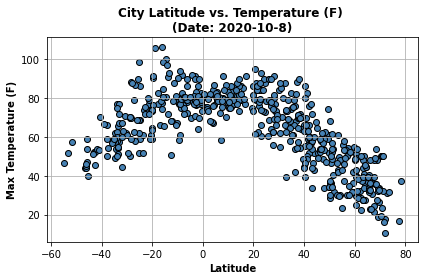

In [13]:
# Create scatter plot between Latitude and Max Temperature
lat_temp = plt.scatter(cities_lat, 
                       weather_data_df['Max Temp'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_temp.png')
plt.show()

#### Observation I

The scatter plot between *city latitude and maximum (max) temperature(F)* shows that cities located closer to the equator line, the max temperature tends to be higher than cities that are located further from the equator.

### Latitude vs. Humidity Plot

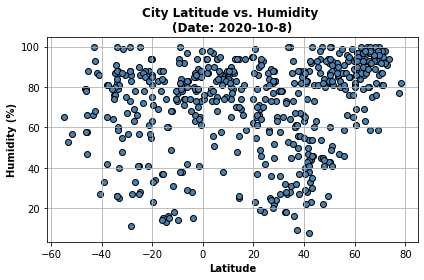

In [14]:
# Create scatter plot between Latitude and Humidity
lat_humd = plt.scatter(cities_lat, 
                       weather_data_df['Humidity'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Humidity \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_humd.png')
plt.show()

#### Observation II

The scatter plot between *city latitude and humidity(%)* shows the irrelevant of the city's location and percentage of humidity.

### Latitude vs. Cloudiness Plot

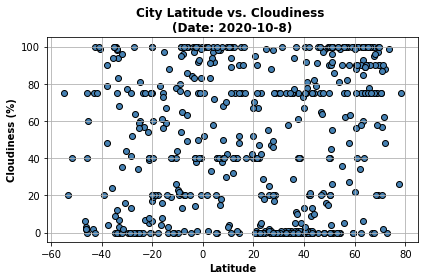

In [15]:
# Create scatter plot between Latitude and Cloundiness
lat_cld = plt.scatter(cities_lat, 
                       weather_data_df['Cloudiness'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Cloudiness \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_cloud.png')
plt.show()

#### Observation III

The scatter plot between *city latitude and cloudiness(%) shows that there is no significant relation between city location and the density of clouds.

### Latitude vs. Wind Speed Plot

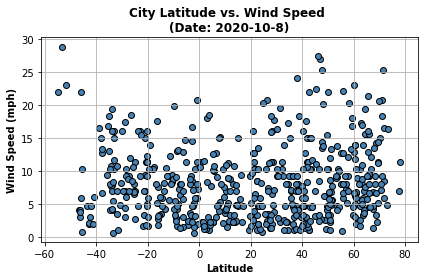

In [16]:
# Create scatter plot between Latitude and Wind Speed
lat_wind = plt.scatter(cities_lat, 
                       weather_data_df['Wind Speed'], 
                       marker='o', 
                       color='steelblue', 
                       edgecolor='black')

# Add title&labels and modify plot&layout
plt.title(f'City Latitude vs. Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')
plt.grid()
plt.tight_layout()

# Save figure and show the the plot
plt.savefig('Images/lat_wind.png')
plt.show()

#### Observation IV

The scatter plot between *city latitude and wind speed(mph)* shows that where cities are located is not related to the speed of wind.    

## Linear Regression

In [17]:
# Generate dataframe only for cities in Northern Hemisphere
north_df = weather_data_df.loc[weather_data_df['Latitude'] >= 0]

# Generate dataframe only for cities in Northern Hemisphere
south_df = weather_data_df.loc[weather_data_df['Latitude'] < 0]

# Linear Regression: Focus on city latitude in Northern and Southern Hemisphere
# Define x_values for latitude in Northern and Southern Hemisphere
north_lat = north_df['Latitude'] # North
south_lat = south_df['Latitude'] # South

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Temp(F) and Latitude is -0.84
The r-squared is: 0.70879


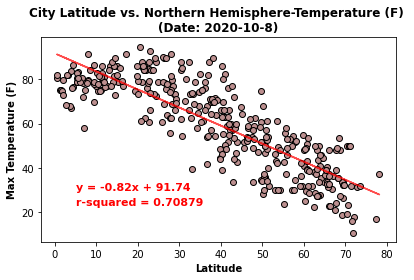

In [18]:
# Define y values: Max Temperature (F)
north_temp = north_df['Max Temp']

# Calculate the correlation
nt_correlation = round(st.pearsonr(north_lat, north_temp)[0],2)
print(f"The correlation between Northern Temp(F) and Latitude is {nt_correlation}")

# Calculate linear regression values
(nt_slope, nt_intercept, nt_rvalue, nt_pvalue, nt_stderr) = st.linregress(north_lat, north_temp)

# Calculate r-squared
nt_r_squared = round(nt_rvalue**2,5)
print(f"The r-squared is: {nt_r_squared}")

# y = mx + b
nt_regress_values = north_lat * nt_slope + nt_intercept
nt_line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(round(nt_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_temp, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(north_lat,nt_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nt_line_eq,(5,30), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nt_r_squared}', (5,23), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_temp_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern Temp(F) and Latitude is 0.66
The r-squared is: 0.43746


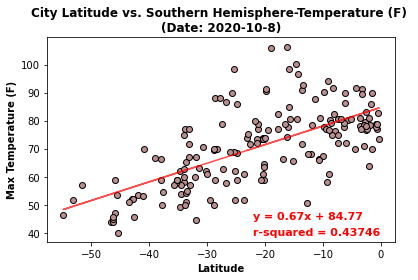

In [19]:
# Define y values: Max Temperature (F)
south_temp = south_df['Max Temp']

# Calculate the correlation
st_correlation = round(st.pearsonr(south_lat, south_temp)[0],2)
print(f"The correlation between Southern Temp(F) and Latitude is {st_correlation}")

# Calculate linear regression values
(st_slope, st_intercept, st_rvalue, st_pvalue, st_stderr) = st.linregress(south_lat, south_temp)

# Calculate r-squared
st_r_squared = round(st_rvalue**2,5)
print(f"The r-squared is: {st_r_squared}")

# y = mx + b
st_regress_values = south_lat * st_slope + st_intercept
st_line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(round(st_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_temp, 
            marker='o', 
            color='rosybrown', 
            edgecolor='black')

plt.plot(south_lat,st_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(st_line_eq,(-22,45), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {st_r_squared}', (-22,39), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Temperature (F) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Max Temperature (F)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_temp_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation V

Divided city latitude into northern and southern hemisphere. Refer to linear regression lines and correlation values between latitude (north and south) and maximum temperature which illustrate that city latitude has an effect on temperature. In the other word, city latitude is correlated to temperature. The linear regression line for the northern hemisphere is an inverse correlation which means the lower latitude in the northern area, the higher the temperature. On the other hand, the linear regression line for the southern hemisphere is positive correlation which means the higher the latitude in the southern area, the higher the temperature. Moreover, r-values represent the predictable temperature data based on latitude. 

**Further Analysis**

The relation between temperature and other meteorological data; for example, humidity, wind speed or cloudiness, to discover other factors that affect the degree of temperature.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Humudity and Latitude is 0.22
The r-squared is: 0.04818


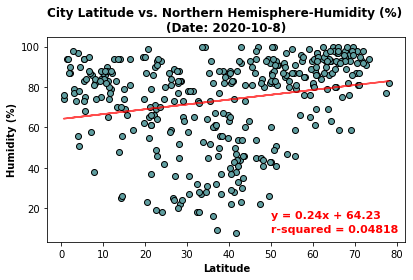

In [20]:
# Define y values: Humidity (%)
north_humd = north_df['Humidity'] # y_values

# Calculate the correlation
nh_correlation = round(st.pearsonr(north_lat, north_humd)[0],2)
print(f"The correlation between Northern Humudity and Latitude is {nh_correlation}")

# Calculate linear regression values
(nh_slope, nh_intercept, nh_rvalue, nh_pvalue, nh_stderr) = st.linregress(north_lat, north_humd)

# Calculate r-squared
nh_r_squared = round(nh_rvalue**2,5)
print(f"The r-squared is: {nh_r_squared}")

# y = mx + b
nh_regress_values = north_lat * nh_slope + nh_intercept
nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_humd, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(north_lat,nh_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nh_line_eq,(50,15), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nh_r_squared}', (50,8), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Humidity (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_humd_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Humidity and Latitude is 0.02
The r-squared is: 0.00023


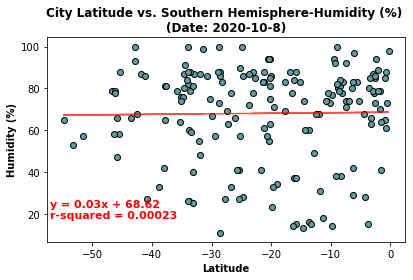

In [21]:
# Define y values: Humidity (%)
south_humd = south_df['Humidity'] # y_values

# Calculate the correlation
sh_correlation = round(st.pearsonr(south_lat, south_humd)[0],2)
print(f"The correlation between Southern Humidity and Latitude is {sh_correlation}")

# Calculate linear regression values
(sh_slope, sh_intercept, sh_rvalue, sh_pvalue, sh_stderr) = st.linregress(south_lat, south_humd)

# Calculate r-squared
sh_r_squared = round(sh_rvalue**2,5)
print(f"The r-squared is: {sh_r_squared}")

# y = mx + b
sh_regress_values = south_lat * sh_slope + sh_intercept
sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_humd, 
            marker='o', 
            color='cadetblue', 
            edgecolor='black')

plt.plot(south_lat,sh_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sh_line_eq,(-57,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sh_r_squared}', (-57,18), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Humidity (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Humidity (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_humd_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VI

Divided city latitude into northern and southern hemisphere. Refer to linear regression lines and correlation values between latitude (north and south) and percentage of humidity which illustrate the weak correlation between city location and humidity in that area. Also, the low r-squared values in both graphs indicate that this model might not be efficient in order to predict the humidity by applying latitude.

**Further Analysis**

Humidity is the concentration of water vapor present in the air ("Humidity", Wikipedia). Therefore, the temperature might be one of the factors that causes the density of humidity. The correlation between humidity and temperature would be a further analysis. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Cloudiness and Latitude is 0.18
The r-squared is: 0.03238


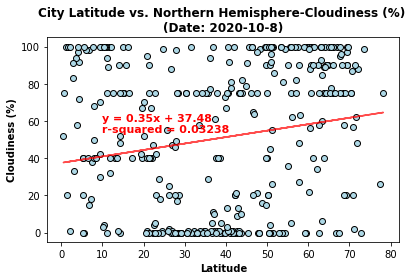

In [22]:
# Define y values: Cloudiness (%)
north_cloud = north_df['Cloudiness']

# Calculate the correlation
nc_correlation = round(st.pearsonr(north_lat, north_cloud)[0],2)
print(f"The correlation between Northern Cloudiness and Latitude is {nc_correlation}")

# Calculate linear regression values
(nc_slope, nc_intercept, nc_rvalue, nc_pvalue, nc_stderr) = st.linregress(north_lat, north_cloud)

# Calculate r-squared
nc_r_squared = round(nc_rvalue**2,5)
print(f"The r-squared is: {nc_r_squared}")

# y = mx + b
nc_regress_values = north_lat * nc_slope + nc_intercept
nc_line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_cloud, 
            marker='o', 
            color='lightblue', 
            edgecolor='black')

plt.plot(north_lat,nc_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nc_line_eq,(10,60), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nc_r_squared}', (10,54), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Cloudiness (%) \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_cloud_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern Cloudiness and Latitude is 0.19
The r-squared is: 0.03574


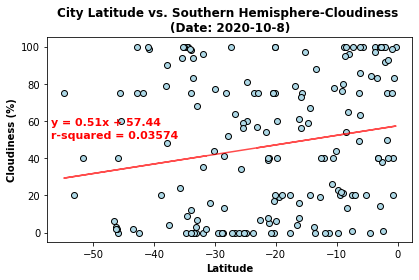

In [23]:
# Define y values: Cloudiness (%)
south_cloud = south_df['Cloudiness']

# Calculate the correlation
sc_correlation = round(st.pearsonr(south_lat, south_cloud)[0],2)
print(f"The correlation between Southern Cloudiness and Latitude is {sc_correlation}")

# Calculate linear regression values
(sc_slope, sc_intercept, sc_rvalue, sc_pvalue, sc_stderr) = st.linregress(south_lat, south_cloud)

# Calculate r-squared
sc_r_squared = round(sc_rvalue**2,5)
print(f"The r-squared is: {sc_r_squared}")

# y = mx + b
sc_regress_values = south_lat * sc_slope + sc_intercept
sc_line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_cloud, 
            marker='o', 
            color='lightblue', 
            edgecolor='black')

plt.plot(south_lat,sc_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sc_line_eq,(-57,58), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sc_r_squared}', (-57,51), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Cloudiness \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Cloudiness (%)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_cloud_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VII

Divided city latitude into northern and southern hemisphere. Refer to correlation values between latitude (north and south) and percentage of cloudiness which illustrate the weak correlation between city location and cloudiness in that area. Linear regression lines and the low r-squared values in both graphs indicate that latitude might not be a significant factor that causes cloudiness.

**Further Analysis**

Other meteorological data might be considered to have more accurate analysis as an other variable to predict the cloudiness.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Wind Speed and Latitude is 0.21
The r-squared is: 0.04561


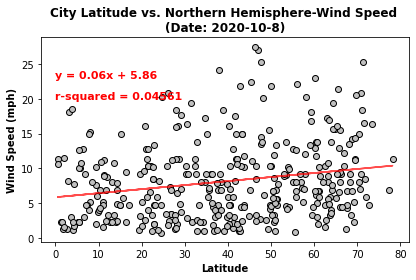

In [24]:
# Define y values: Wind Speed (mph)
north_wind = north_df['Wind Speed']

# Calculate the correlation
nw_correlation = round(st.pearsonr(north_lat, north_wind)[0],2)
print(f"The correlation between Northern Wind Speed and Latitude is {nw_correlation}")

# Calculate linear regression values
(nw_slope, nw_intercept, nw_rvalue, nw_pvalue, nw_stderr) = st.linregress(north_lat, north_wind)

# Calculate r-squared
nw_r_squared = round(nw_rvalue**2,5)
print(f"The r-squared is: {nw_r_squared}")

# y = mx + b
nw_regress_values = north_lat * nw_slope + nw_intercept
nw_line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(north_lat,
            north_wind, 
            marker='o', 
            color='silver', 
            edgecolor='black')

plt.plot(north_lat,nw_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(nw_line_eq,(0,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {nw_r_squared}', (0,20), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Northern Hemisphere-Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/north_wind_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern Wind Speed and Latitude is -0.21
The r-squared is: 0.04601


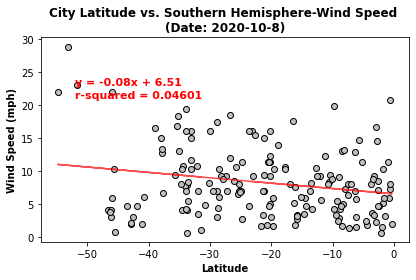

In [25]:
# Define y values: Wind Speed (mph)
south_wind = south_df['Wind Speed']

# Calculate the correlation
sw_correlation = round(st.pearsonr(south_lat, south_wind)[0],2)
print(f"The correlation between Southern Wind Speed and Latitude is {sw_correlation}")

# Calculate linear regression values
(sw_slope, sw_intercept, sw_rvalue, sw_pvalue, sw_stderr) = st.linregress(south_lat, south_wind)

# Calculate r-squared
sw_r_squared = round(sw_rvalue**2,5)
print(f"The r-squared is: {sw_r_squared}")

# y = mx + b
sw_regress_values = south_lat * sw_slope + sw_intercept
sw_line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(south_lat,
            south_wind, 
            marker='o', 
            color='silver', 
            edgecolor='black')

plt.plot(south_lat,sw_regress_values, color='red', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(sw_line_eq,(-52,23), fontsize=11, color="red", fontweight='bold')
plt.annotate(f'r-squared = {sw_r_squared}', (-52,21), fontsize=11, color="red", fontweight='bold')

# Define title and x/y labels
plt.title(f'City Latitude vs. Southern Hemisphere-Wind Speed \n(Date: {date})', fontweight='bold')
plt.xlabel('Latitude', fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
plt.savefig('Images/south_wind_lat.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Observation VII

Divided city latitude into northern and southern hemisphere. Refer to correlation values between latitude (north and south) and wind speed (mph) which illustrate the weak correlation between city location and wind speed in that area. Also, the linear regression lines and low r-squared values in both graphs support that latitude data might not be a good indicator to predict wind speed.

**Further Analysis**

Wind is air in motion. It is produced by the uneven heating of the earth's surface by the sun ("Wind", Weather Wiz Kids). That implies that temperature might be a significant factor causing wind. The further analysis would be finding statistical data between temperature and wind speed and visualize it into a plot.